In [2]:
# Load the CSV file

import pandas as pd
df = pd.read_csv("C:\\Users\\juane\\OneDrive\\Escritorio\\Datos\\features_labels.csv")

In [3]:
# Display the first few rows of the DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,8.393402,-82.699070,224.97456,-184.360870,115.632950,-44.428425,161.095250,52.617020,-4.672750,-23.138855,...,-116.917400,20.037370,-47.000920,185.424700,-88.976260,174.31981,30.567362,59.997787,-62.322160,0.0
1,-7.632062,-5.637404,69.52105,5.914921,-55.462612,-92.002860,-10.661327,-69.697426,-50.270830,66.026080,...,2.782060,-102.426796,-141.408520,90.822815,-35.101303,129.99803,40.220932,-9.928968,97.121850,0.0
2,40.987960,81.039160,102.12196,-81.862350,123.411255,-87.132935,-2.901389,81.119630,-70.538240,29.654459,...,-50.962563,-54.256393,-91.905410,184.686830,-80.962180,89.75664,59.517975,103.358770,54.863686,0.0
3,-98.528920,-65.590870,133.72675,-106.533820,103.787870,-81.972860,103.474550,118.767830,45.301334,3.649861,...,-89.563416,9.523295,-129.385620,132.948350,-50.320206,173.57028,33.502846,92.679115,29.308826,0.0
4,15.474375,-34.089394,123.60596,-90.402740,9.463451,-35.685093,97.138280,50.303032,-17.686377,128.894150,...,-53.616905,64.458700,35.316154,163.837880,-82.975230,157.84734,101.516624,-5.832964,-66.415710,0.0


In [4]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
96       0
97       0
98       0
99       0
label    0
Length: 101, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

In [15]:
# Separate the features and labels
X = df.drop(columns=['label']).values
y = df['label'].values

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Define the evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(report)
    
    return accuracy, precision, recall, f1

In [18]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest")
rf_metrics = evaluate_model(rf_model, X_test, y_test)

Random Forest
Accuracy: 0.9596881959910913
Precision: 0.9619500594530321
Recall: 0.9524370143630798
F1-Score: 0.9571699006152391
Confusion Matrix:
[[4573  160]
 [ 202 4045]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      4733
         1.0       0.96      0.95      0.96      4247

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [19]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print("Decision Tree")
dt_metrics = evaluate_model(dt_model, X_test, y_test)

Decision Tree
Accuracy: 0.910467706013363
Precision: 0.9228690739376074
Recall: 0.8846244407817283
F1-Score: 0.9033421495551817
Confusion Matrix:
[[4419  314]
 [ 490 3757]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      4733
         1.0       0.92      0.88      0.90      4247

    accuracy                           0.91      8980
   macro avg       0.91      0.91      0.91      8980
weighted avg       0.91      0.91      0.91      8980



In [20]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
print("K-Nearest Neighbors")
knn_metrics = evaluate_model(knn_model, X_test, y_test)

K-Nearest Neighbors
Accuracy: 0.9408685968819599
Precision: 0.9251716247139589
Recall: 0.9519660937132093
F1-Score: 0.938377625623767
Confusion Matrix:
[[4406  327]
 [ 204 4043]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      4733
         1.0       0.93      0.95      0.94      4247

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [21]:
# Collect the metrics into a DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'K-Nearest Neighbors'],
    'Accuracy': [rf_metrics[0], dt_metrics[0], knn_metrics[0]],
    'Precision': [rf_metrics[1], dt_metrics[1], knn_metrics[1]],
    'Recall': [rf_metrics[2], dt_metrics[2], knn_metrics[2]],
    'F1-Score': [rf_metrics[3], dt_metrics[3], knn_metrics[3]]
})

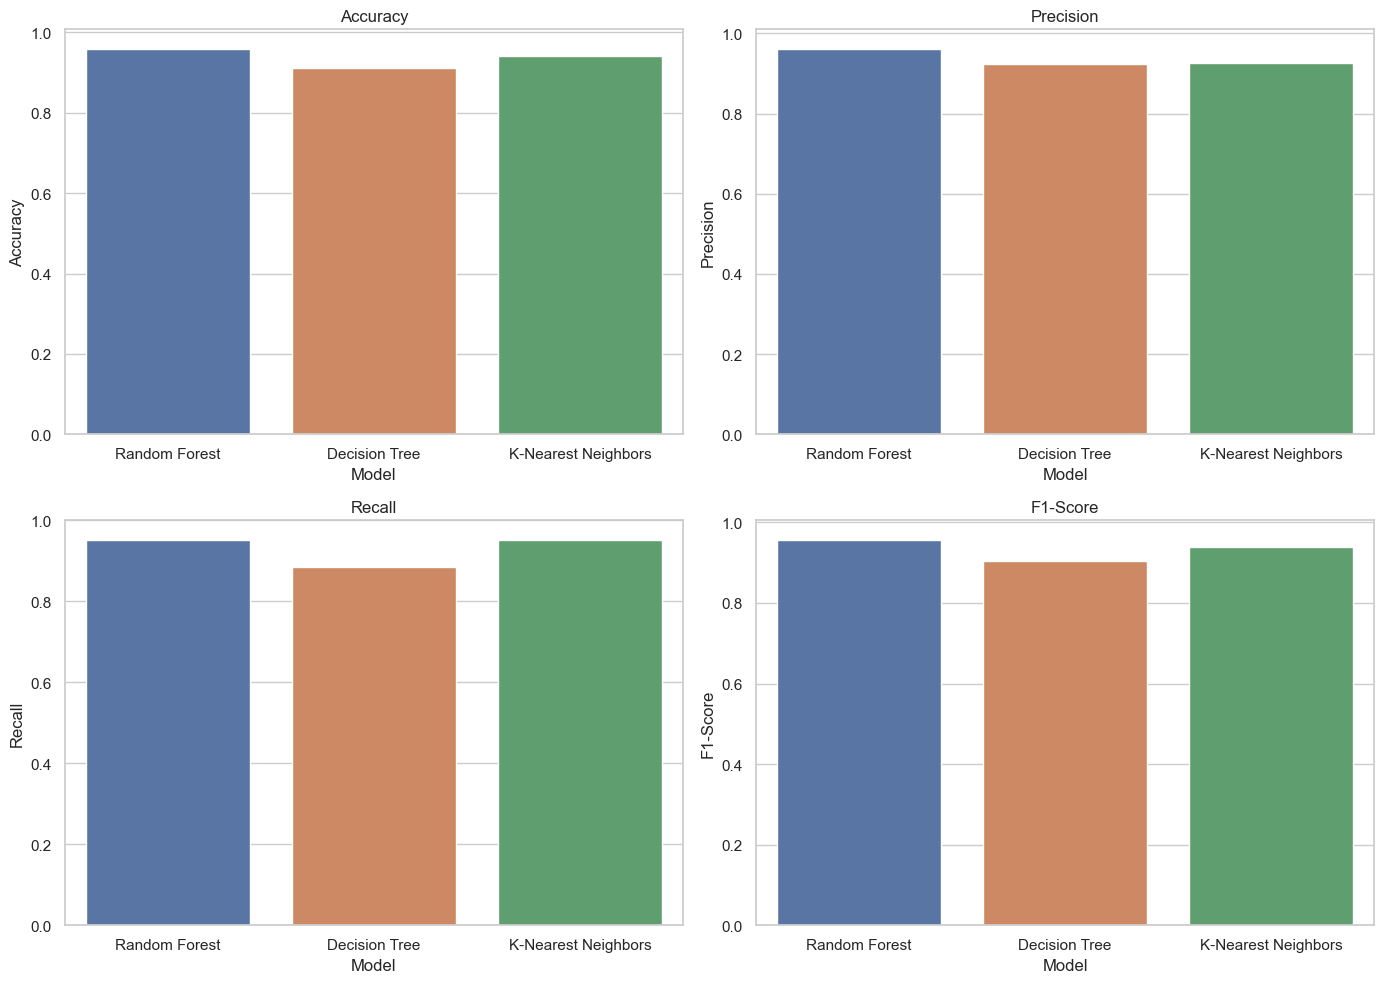

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Create a bar plot for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')

sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0, 1])
axes[0, 1].set_title('Precision')

sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[1, 0])
axes[1, 0].set_title('Recall')

sns.barplot(x='Model', y='F1-Score', data=metrics_df, ax=axes[1, 1])
axes[1, 1].set_title('F1-Score')

plt.tight_layout()
plt.show()